This lab will be mostly focused on constructing loops inside of loops.

# Exercise 1: Summing matrix entries

Oftentimes we want to generate a random matrix to test an algorithm. 
Here is how you generate an $n \times m$ matrix with randomly chosen elements (lying between 0 and 1):

In [1]:
import numpy as np 
number_rows = 2
number_cols = 3
np.random.rand(number_rows,number_cols)

array([[ 0.42244471,  0.24864564,  0.59533135],
       [ 0.22606616,  0.73560283,  0.11541708]])

### Question
Write a function that returns the sum of the elements of a random matrix of size $n\times n$. The implementation should involve looping through the matrix' elements. 

### Solution

In [2]:
def sum_matrix(n): 
    s = 0.0
    A = np.random.rand(n,n)
    for i in range(n): 
        for j in range(n): 
            s += A[i,j]
    return s

3.2474913052059522

### Question
Plot 
$$\frac{1}{n^2} \texttt{sum_matrix(n)}$$

against $n$. What value does the function approach as $n$ approaches infinity? Why do you think it approaches that value? 

#### Hint 
You might want to feed a `numpy` array into `sum_matrix` and get back an array of the output values. You can do this, but you must first **vectorize** `sum_matrix`. The syntax is:

In [4]:
def f(): 
    pass 
f_vectorized = np.vectorize(f)

#### Hint
You may find it useful to be able to divide two `numpy` arrays element-wise. Here's an example doing that:

In [3]:
m = np.array(range(0,4), dtype=float) 
print 'm = ', m
n = np.array(range(1,5), dtype=float) 
print 'n = ', n
print 'm/n = ', m/n

m =  [ 0.  1.  2.  3.]
n =  [ 1.  2.  3.  4.]
m/n =  [ 0.          0.5         0.66666667  0.75      ]


Notice that in the above code snippet, I chose to make the elements of the arrays `m` and `n` of type `float`. In Python 2, when both `m` and `n` are of an integer type, `m/n` will do integer arithmetic, i.e. return the quotient, which is not what we want. 

### Solution

Text(0.5,0,u'n')

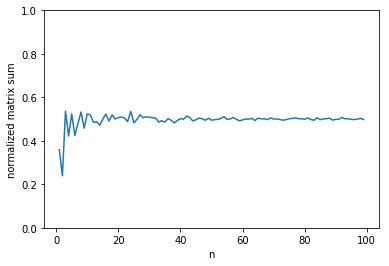

In [5]:
from matplotlib import pyplot as plt 
%matplotlib inline 

n = np.array(range(1,100)) 
sum_matrix_vectorized = np.vectorize(sum_matrix)
normalized_sum = sum_matrix_vectorized(n)/(n*n) # elementwise division

plt.plot(n,normalized_sum)
plt.gca().set_ylim([0, 1])    
plt.ylabel('normalized matrix sum')
plt.xlabel('n')

We see that the normalized matrix sum approaches 0.5. This is because this number is 

$$ Z_m = \frac{1}{m} \sum_{i=1}^m X_i $$ 

where $X_i$ are independent and identically distributed random variables, each uniformly distributed between 0 and 1. In other words $Z_m$ is the average of the sample $\{X_1, X_2, \ldots , X_m\}$. [The Law of Large Numbers](https://en.wikipedia.org/wiki/Law_of_large_numbers) says that, in the limit of large $m$, $Z_m$ approaches the expected value of $X_i$, which is 0.5. 

# Exercise 2: Vectorizing

Python is much more efficient when you add two vectors instead of adding a large number of scalars. This is yet another example of vectorizing, allowing your code to run purely with vector operations. 

For example, the following will add the rows of matrix, without looping over its columns:

In [6]:
B = np.array([[1,2],[3,4]])
print 'B: '
print B 
print 'sum of rows: '
print B[0,:] + B[1,:]

B: 
[[1 2]
 [3 4]]
sum of rows: 
[4 6]


### Question

Implement a vectorized version of `sum_matrix`, called `sum_matrix_vecd`, in which you first sum all the rows of the matrix, constructing a vector, and then sum all the elements of the vector.

### Solution

In [9]:
def sum_matrix_vecd(n): 
    A = np.random.rand(n,n)
    s_vector = A[0,:]
    for i in range(1,n): 
        s_vector += A[i,:]
    s = 0.0
    for j in range(n): 
        s += s_vector[j]    
    return s

### Question
Examine the speed difference between your two implementations for summing matrix entries.

### Solution

In [8]:
def time_function(f, x=100): 
    import time
    start = time.time()
    f(x)
    end = time.time()
    return end - start

print 'time taken to execute sum_matrix = ', time_function(sum_matrix)
print 'time taken to execute sum_matrix_vecd = ', time_function(sum_matrix_vecd)

time taken to execute sum_matrix =  0.00652503967285
time taken to execute sum_matrix_vecd =  0.000756025314331


# Exercise 3: Triangular matrices

### Question 

Write a function `upper_triangular` that takes a square matrix, zeros out entries to make it an upper-triangular matrix, and returns the  matrix.

### Solution

In [33]:
def upper_triangular(A):
    number_rows, number_cols = A.shape
    assert(number_rows==number_cols) 
    for i in range(1,number_rows): 
        for j in range(i): 
            A[i,j] = 0.0
    return A

def test_upper_triangular(n): 
    B = np.random.rand(n, n)
    print B
    print
    print upper_triangular(B)

In [35]:
test_upper_triangular(2)

[[ 0.72257012  0.1728715 ]
 [ 0.11597705  0.14852154]]

[[ 0.72257012  0.1728715 ]
 [ 0.          0.14852154]]


In [34]:
test_upper_triangular(4)

[[ 0.48484674  0.65471396  0.17852911  0.91895552]
 [ 0.03232863  0.24835981  0.67808839  0.74721694]
 [ 0.26186227  0.31133456  0.96855788  0.97468461]
 [ 0.12890266  0.28028907  0.14968893  0.76704443]]

[[ 0.48484674  0.65471396  0.17852911  0.91895552]
 [ 0.          0.24835981  0.67808839  0.74721694]
 [ 0.          0.          0.96855788  0.97468461]
 [ 0.          0.          0.          0.76704443]]
